In [8]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [20]:
df= pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [21]:
df.columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

column name is not provided here

In [24]:
df.rename(columns={'1':'id','1.52101':'RI','13.64':'Na','4.49':'Mg','1.10':'Al','71.78':'Si','0.06':'K','8.75':'Ca','0.00':'Ba','0.00.1':'Fe','1.1':'glass_type'},inplace=True)
df

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [25]:
df.head(5)

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [26]:
df.tail(5)

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [28]:
df.shape

(213, 11)

In [29]:
type(df)

pandas.core.frame.DataFrame

In [30]:
df.sample()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
138,140,1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.0,0.0,2


In [31]:
df.nunique()

id            213
RI            177
Na            142
Mg             93
Al            117
Si            132
K              65
Ca            143
Ba             34
Fe             32
glass_type      6
dtype: int64

In [32]:
df.isnull().sum()

id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

In [33]:
df.describe()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          213 non-null    int64  
 1   RI          213 non-null    float64
 2   Na          213 non-null    float64
 3   Mg          213 non-null    float64
 4   Al          213 non-null    float64
 5   Si          213 non-null    float64
 6   K           213 non-null    float64
 7   Ca          213 non-null    float64
 8   Ba          213 non-null    float64
 9   Fe          213 non-null    float64
 10  glass_type  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [35]:
df['glass_type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [36]:
(df==0).sum()

id              0
RI              0
Na              0
Mg             42
Al              0
Si              0
K              30
Ca              0
Ba            175
Fe            143
glass_type      0
dtype: int64

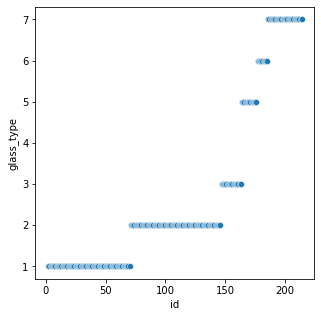

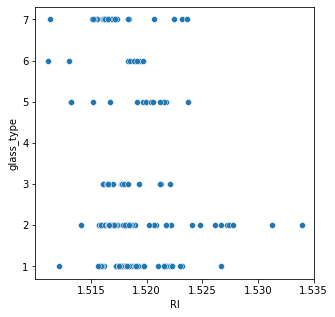

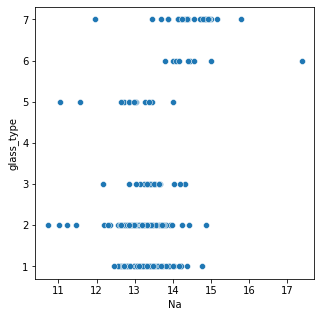

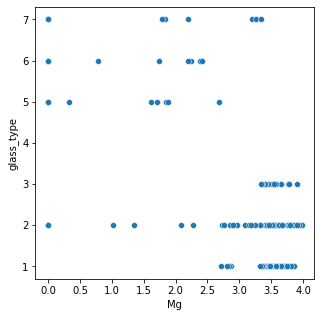

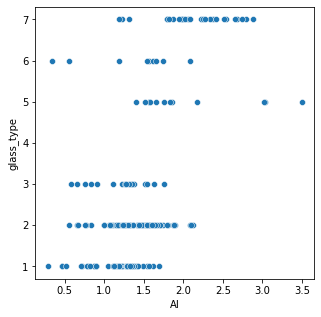

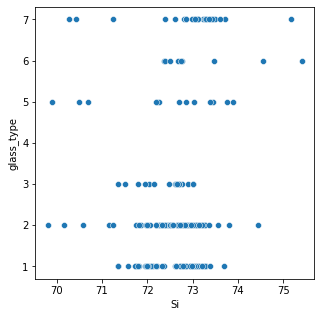

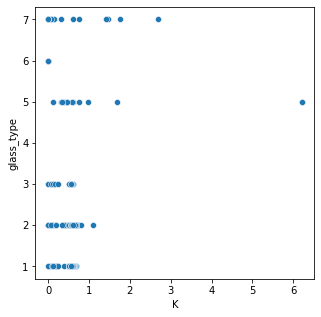

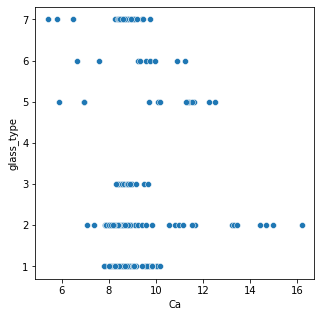

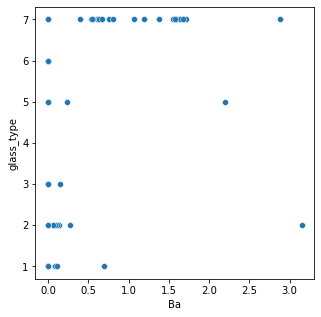

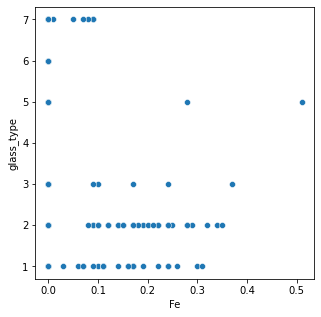

In [45]:
column_nm = list (df.columns)
for col in df[column_nm]:
    if col=="glass_type":
        pass
    else:
        fig = plt.figure(figsize = (5,5))
        sns.scatterplot()
        sns.scatterplot(x=col, y="glass_type", data= df)


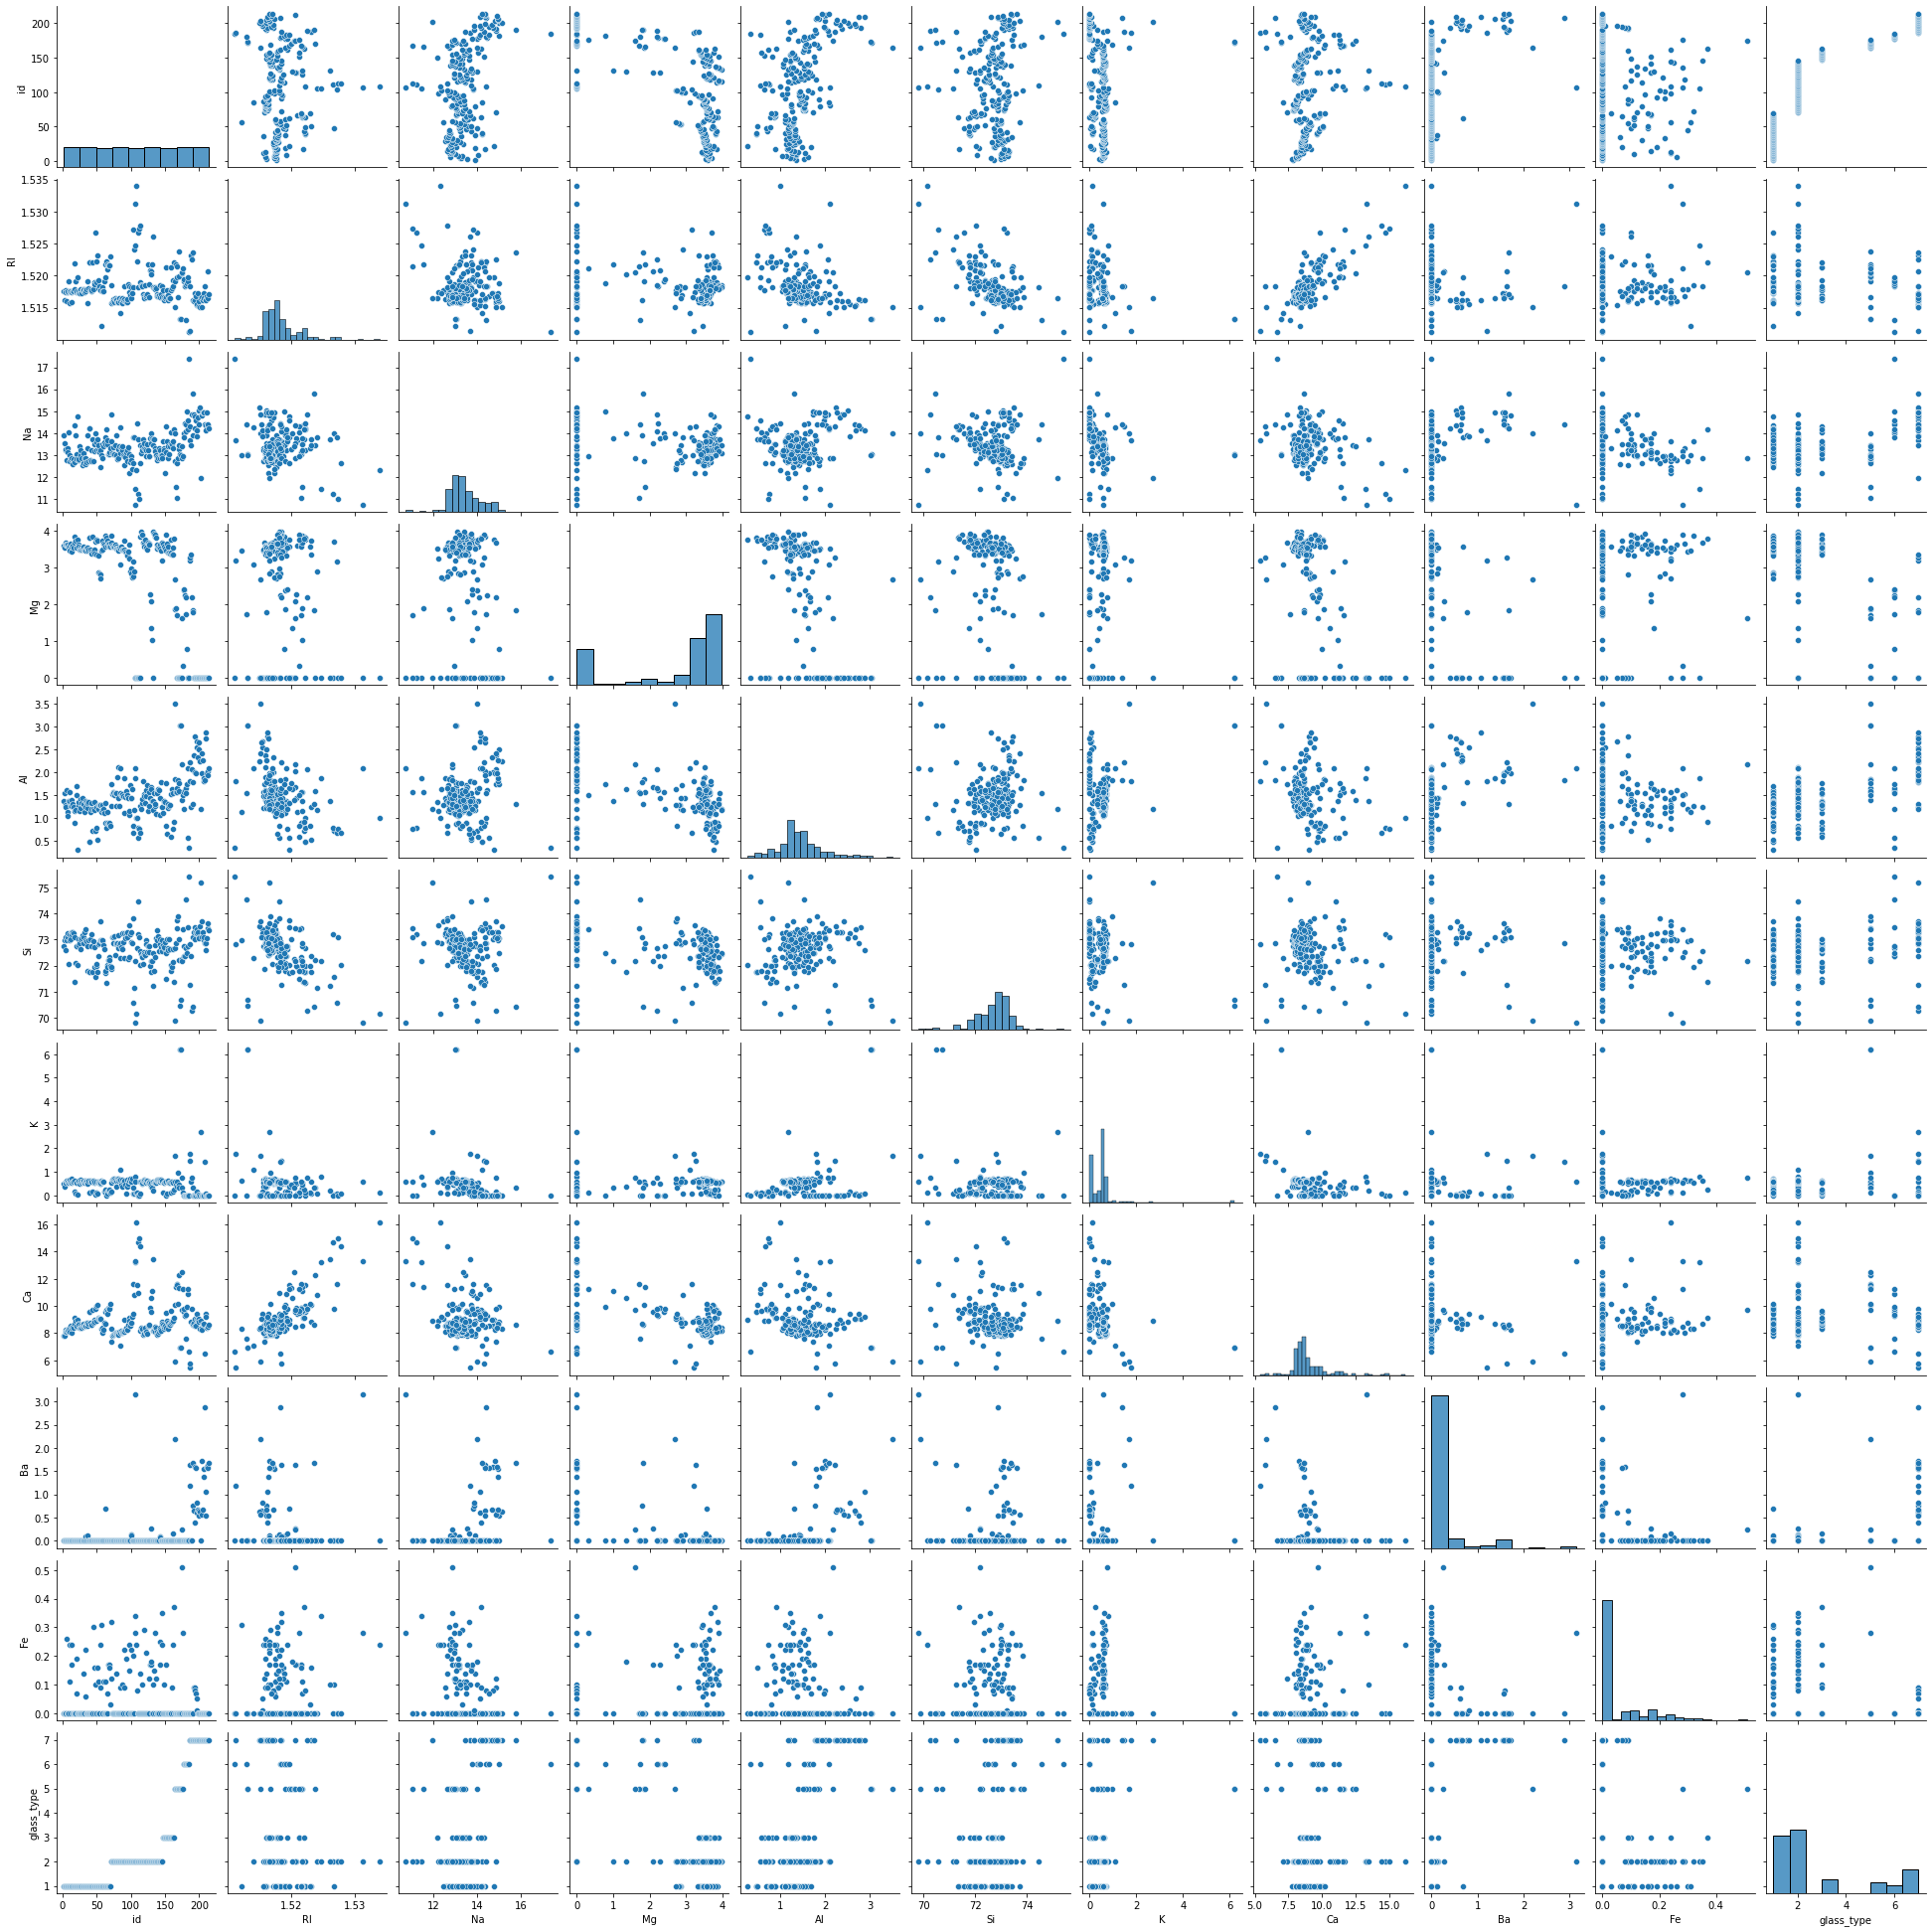

In [46]:
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='glass_type', ylabel='count'>

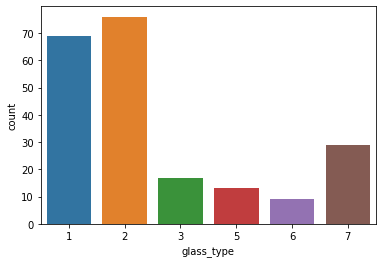

In [47]:
# Checking for class imbalance

sns.countplot(df['glass_type'])

 Class 1, 2 ,7 carry the most of values and 3,5,6 carry minimum values.

#window glass is encoding with '1' and non window glass '0'

In [48]:
df['glass_type'] = np.where((df['glass_type'] <5),1,0)
df['glass_type'].unique()

array([1, 0])

<AxesSubplot:xlabel='glass_type', ylabel='count'>

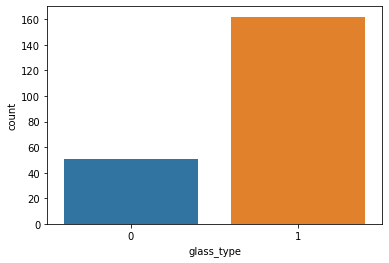

In [49]:
sns.countplot(df['glass_type'])

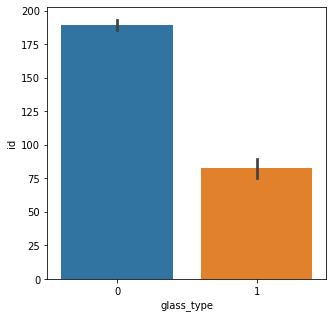

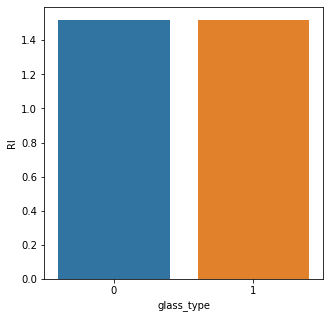

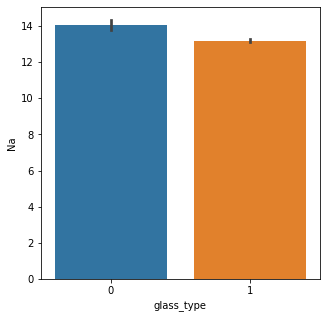

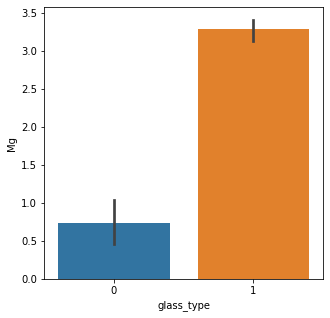

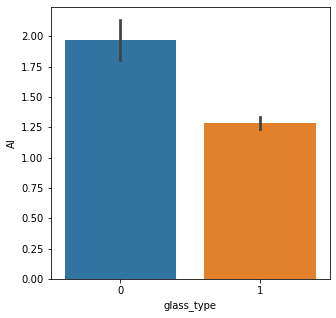

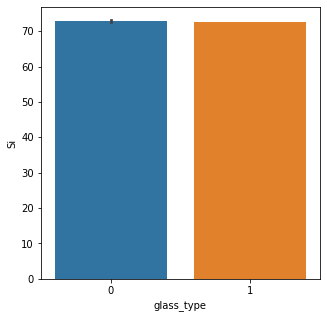

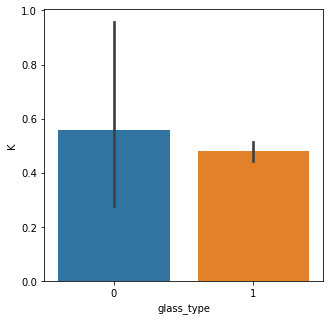

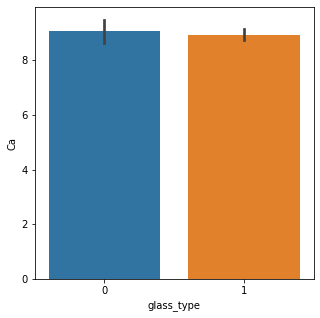

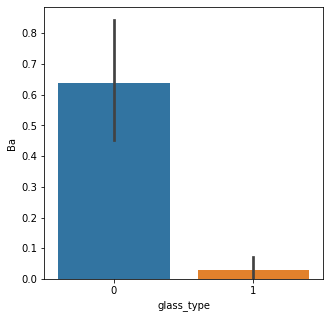

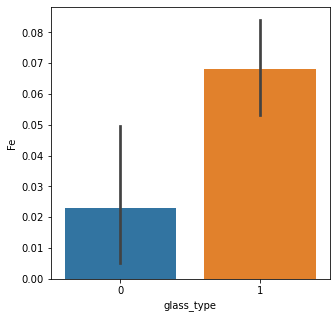

In [58]:
column_nm = list (df.columns)
for col in df[column_nm]:
    if col=="glass_type":
        pass
    else:
        fig = plt.figure(figsize = (5,5))
        sns.barplot(x="glass_type", y=col, data= df)


id,Al, Ba has inverse relation with glass_type whereas
Fe, Mg has direct relation with glass_type 
rest of the attributes are neutral eith respect to glass_type

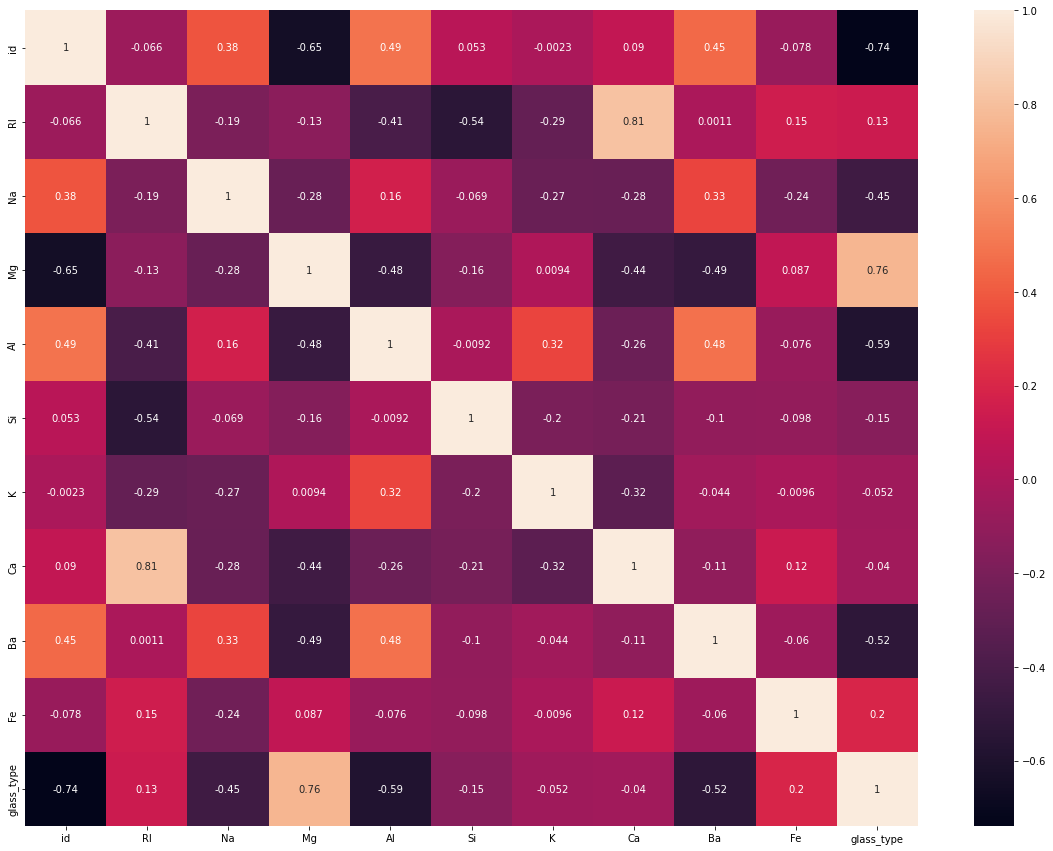

In [52]:
# plotting heat map
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.show()

heatmap again proves the above assessment

In [55]:
x = df.drop(columns = ['glass_type'])
y = df['glass_type']

In [56]:
x.skew()

id    0.000000
RI    1.639658
Na    0.457318
Mg   -1.154323
Al    0.900017
Si   -0.744546
K     6.549276
Ca    2.040591
Ba    3.406749
Fe    1.747173
dtype: float64

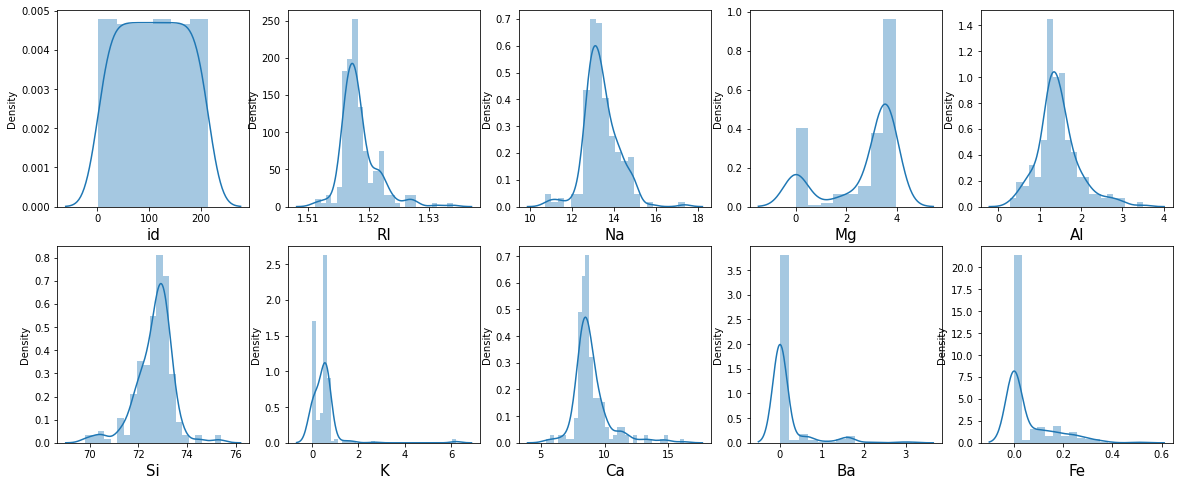

In [57]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21))
plotnum = 1

for col in x:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

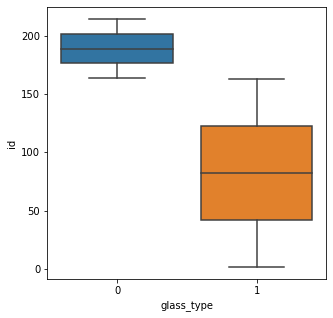

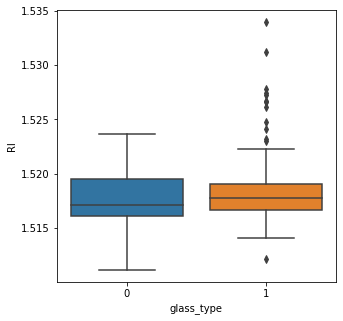

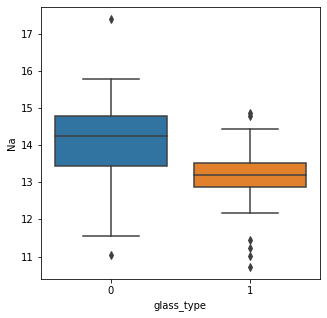

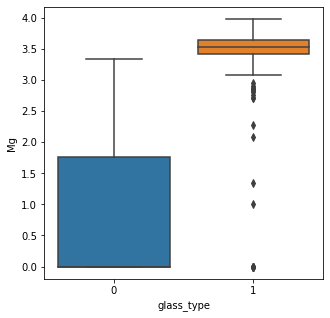

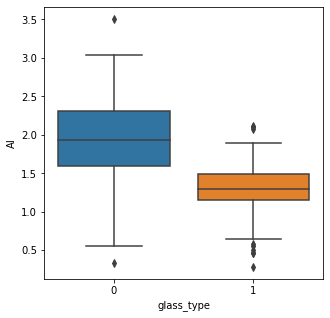

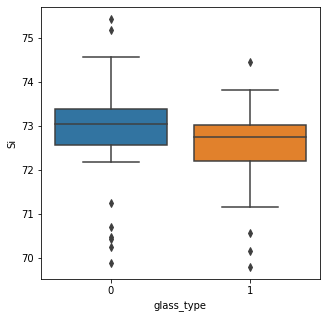

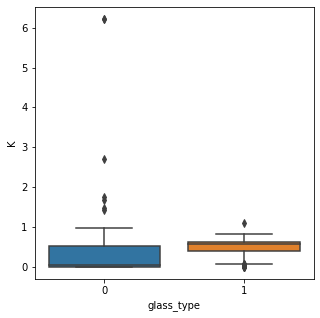

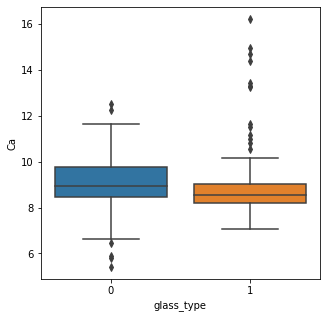

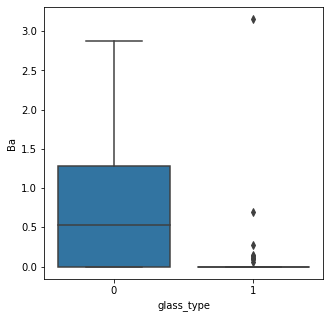

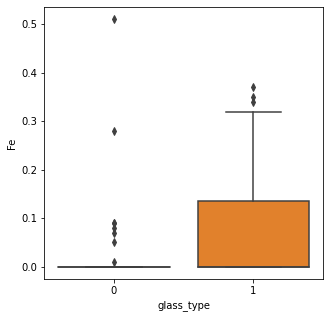

In [59]:
# Plot a boxplot to check for Outliers
column_nm = list (df.columns)
for col in df[column_nm]:
    if col=="glass_type":
        pass
    else:
        fig = plt.figure(figsize = (5,5))
        sns.boxplot(x="glass_type", y=col, data= df)



outliers are present in almost all columns except id

Z score method to remove outliers

In [63]:
w= df.copy()

from scipy.stats import zscore

zscor = zscore(w)
zabs = np.abs(zscor)
dh = w[(zabs <3).all(axis=1)] #taking threshold value as 3
print(dh.shape)

print(w.shape)

(174, 11)
(193, 11)


In [64]:
# Checking the dataloss in %

loss = (193-174)/193*100
loss

9.844559585492227

In [65]:
print(dh.skew())
print(x.skew())


id            0.154221
RI            0.962798
Na            0.729253
Mg           -1.981645
Al            0.620774
Si           -0.336436
K            -0.696588
Ca            1.373982
Ba            3.373998
Fe            1.379811
glass_type   -2.049405
dtype: float64
id    0.000000
RI    1.639658
Na    0.457318
Mg   -1.154323
Al    0.900017
Si   -0.744546
K     6.549276
Ca    2.040591
Ba    3.406749
Fe    1.747173
dtype: float64


dh is less skewed vis-s-vis x

In [66]:
# Reducing the skewness further
df = dh.copy()
feat = ['Mg','Ca','Ba','Fe']

skewdf = df[feat].copy()

#Trying log transform method

for col in skewdf:
    skewdf[col] = np.log(skewdf[col])
skewdf.skew()

Mg        NaN
Ca    1.10611
Ba        NaN
Fe        NaN
dtype: float64

In [67]:
# Trying power transform method

from sklearn.preprocessing import PowerTransformer

powtrans = PowerTransformer(method = 'yeo-johnson', standardize = True)
df1 = df[feat].copy()
df1.skew()

Mg   -1.981645
Ca    1.373982
Ba    3.373998
Fe    1.379811
dtype: float64

In [68]:
transformed = powtrans.fit_transform(df1)

transformed = pd.DataFrame(transformed, columns =df1.columns)
transformed.skew()

Mg   -1.172198
Ca   -0.015238
Ba    2.459143
Fe    0.845236
dtype: float64

In [72]:
transformed.index = df.index
df[feat] = transformed[feat]
x = df.drop(columns = ['glass_type'])
y = df['glass_type']
x.skew()

id    0.154221
RI    0.962798
Na    0.729253
Mg   -1.172198
Al    0.620774
Si   -0.336436
K    -0.696588
Ca   -0.015238
Ba    2.459143
Fe    0.845236
dtype: float64

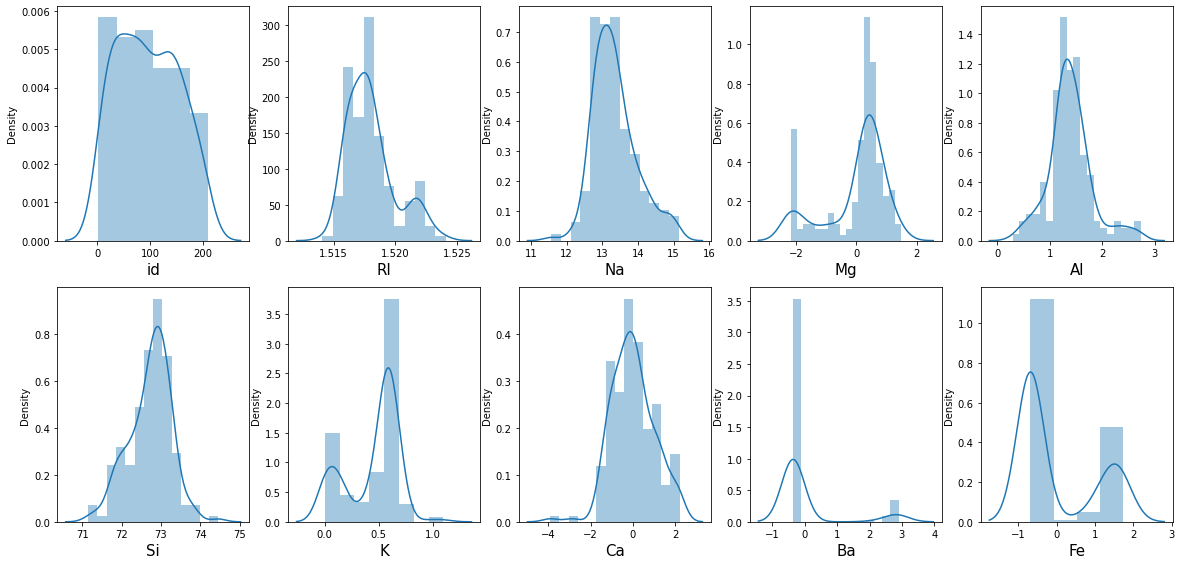

In [73]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in x:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

Distribution looks much more normalised now

# Data Standardization

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-1.62511706, -0.21073169,  0.87576521, ..., -1.5551551 ,
        -0.35938739, -0.68163798],
       [-1.60776279, -0.94233851,  0.28898659, ..., -1.6785217 ,
        -0.35938739, -0.68163798],
       [-1.59040853, -0.18515104, -0.2325944 , ..., -0.71355289,
        -0.35938739, -0.68163798],
       ...,
       [ 1.86308989, -1.47441619,  2.44050818, ..., -0.40455257,
         2.89577516, -0.68163798],
       [ 1.89779841, -0.94745464,  2.60350224, ...,  0.09968445,
         2.89585646, -0.68163798],
       [ 1.96721547, -0.82978361,  1.65813669, ...,  0.96971889,
         2.8957393 , -0.68163798]])

In [76]:
# Checking for Multicollinearity using Variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,id,1.686655
1,RI,5.558358
2,Na,5.003965
3,Mg,7.827029
4,Al,4.255885
5,Si,4.308654
6,K,4.033619
7,Ca,7.807099
8,Ba,1.686739
9,Fe,1.077697


# PCA (Principal component Analysis )

In [77]:
# perform PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

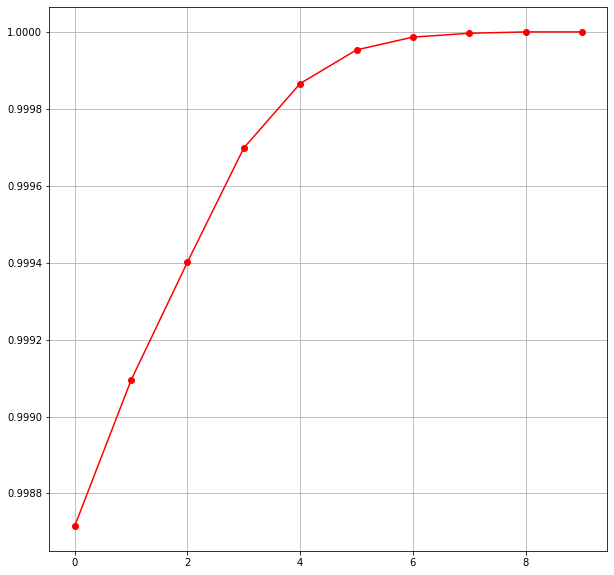

In [78]:
# plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. we shall pick the first 8 components for our prediction

In [79]:
# PCA with 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)
x_new

array([[-9.36468521e+01, -3.49199287e-01, -9.32578281e-01, ...,
         8.72054491e-01,  1.67241590e-01,  5.44384601e-02],
       [-9.26468685e+01, -3.95582186e-01, -9.03710284e-01, ...,
         6.85836669e-01,  1.20040080e-01, -7.93088519e-02],
       [-9.16482978e+01, -6.33446964e-02, -8.00051044e-01, ...,
         7.81888261e-02, -1.09762180e-01, -1.06445655e-02],
       ...,
       [ 1.07395860e+02,  1.20756279e+00, -8.49664060e-01, ...,
         3.97265727e-01,  4.95527652e-01, -2.34163985e-01],
       [ 1.09397457e+02,  1.49473636e+00, -8.56585832e-01, ...,
         3.75878326e-01,  3.29988533e-01, -1.28777438e-01],
       [ 1.13399931e+02,  1.91577647e+00, -7.85658038e-01, ...,
        -1.23558338e-01, -4.36663843e-01, -4.86842518e-01]])

# Kbest feature selection

In [81]:
from sklearn.feature_selection import SelectKBest, f_classif
xbest = x.drop(columns = ['RI','Si','Ca'])
scaled_x = sc.fit_transform(xbest)

# Train Test Split

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .31, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 1.0 on Random State: 1


In [83]:
 x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .30, random_state=i)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Data Modeling

In [84]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
LOGR.fit(x_train,y_train)
RFC.fit(x_train,y_train)
DTC.fit(x_train,y_train)
SV.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

Accuracy Score for each model

In [86]:
 #Logistic Regression Model Accuracy
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)
conf_matrx = confusion_matrix(y_test,LOGRpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[ 8  0]
 [ 0 45]]
Accuracy Score:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        45

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [87]:
# Random Forest Classifier Model Accuracy

RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)
conf_matrx = confusion_matrix(y_test,RFCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[ 7  1]
 [ 0 45]]
Accuracy Score:               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.98      1.00      0.99        45

    accuracy                           0.98        53
   macro avg       0.99      0.94      0.96        53
weighted avg       0.98      0.98      0.98        53



In [88]:
# Decision Tree Classifier Model Accuracy
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)
conf_matrx = confusion_matrix(y_test,DTCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[ 7  1]
 [ 0 45]]
Accuracy Score:               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.98      1.00      0.99        45

    accuracy                           0.98        53
   macro avg       0.99      0.94      0.96        53
weighted avg       0.98      0.98      0.98        53



In [89]:
# SV Classifier Model Accuracy
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[ 6  2]
 [ 0 45]]
Accuracy Score:               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.96      1.00      0.98        45

    accuracy                           0.96        53
   macro avg       0.98      0.88      0.92        53
weighted avg       0.96      0.96      0.96        53



In [90]:
# KNeighbors Classifier Model Accuracy
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)
conf_matrx = confusion_matrix(y_test,KNNpred)

print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[ 4  4]
 [ 0 45]]
Accuracy Score:               precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.92      1.00      0.96        45

    accuracy                           0.92        53
   macro avg       0.96      0.75      0.81        53
weighted avg       0.93      0.92      0.91        53



# Model Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score as cvs

#Decision Tree Classifier
print("Decision Tree Classifier:" ,cvs(DTC,scaled_x,y,cv=5).mean())

#Logistic Regression
print("Logistic Regression:",cvs(LOGR,scaled_x,y,cv=5).mean())

# Random Forest Classifier
print(" Random Forest Classifier:",cvs(RFC,scaled_x,y,cv=5).mean())



# SV Classifier
print("SV Classifier:",cvs(SV,scaled_x,y,cv=5).mean())

#K Nearest Neighnors Classifier
print("K Nearest Neighnors Classifier:",cvs(KNN,scaled_x,y,cv=5).mean())

Decision Tree Classifier: 0.8889075630252101
Logistic Regression: 0.937142857142857
 Random Forest Classifier: 0.9010084033613446
SV Classifier: 0.9257142857142856
K Nearest Neighnors Classifier: 0.9314285714285713


# ROC AUC Scores

In [92]:
# Decision Tree Classifier
print("Decision Tree Classifier:",roc_auc_score(y_test,DTCpred))

#Logistic Regression
print("Logistic Regression:" ,roc_auc_score(y_test,LOGRpred))

#Random Forest Classifier
print("Random Forest Classifier:",roc_auc_score(y_test,RFCpred))

#SV Classifier
print("SV Classifier:",roc_auc_score(y_test,SVpred))

#K Nearest Neighbors Classifier
print("K Nearest Neighbors Classifier:",roc_auc_score(y_test,KNNpred))

Decision Tree Classifier: 0.9375
Logistic Regression: 1.0
Random Forest Classifier: 0.9375
SV Classifier: 0.875
K Nearest Neighbors Classifier: 0.75


Logistic Regression is the best model for the dataset with score 100%

# ROC AUC Curves

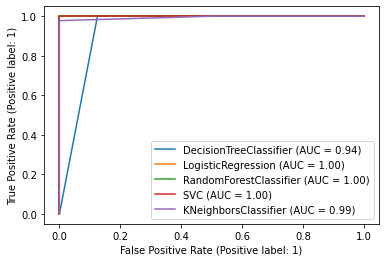

In [93]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,SV,KNN]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

Logistic Regression and random forest classifier is the best model for the dataset with score 100%

# Hyper Parameter Tuning

RandomForest Classifier

In [95]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[30,50,60],'criterion':['gini','entropy','log_loss']}
Gridcv = GridSearchCV(RandomForestClassifier(),parameter,cv=5 )
Gridcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [30, 50, 60]})

In [96]:
Gridcv.best_params_

{'criterion': 'gini', 'n_estimators': 30}

In [108]:
Best_mod2 = RandomForestClassifier(n_estimators = 30,criterion = 'gini')
Best_mod2.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

98.11320754716981


In [109]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[ 7,  1],
       [ 0, 45]], dtype=int64)

Logistic Regression

In [110]:
parameter = {'penalty':['l1', 'l2', 'elasticnet', 'none'], 'multi_class':['auto', 'ovr', 'multinomial']}
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1)
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [111]:
GridCV.best_params_

{'multi_class': 'auto', 'penalty': 'l2'}

In [112]:
Best_mod1 = LogisticRegression(penalty= 'l2',multi_class = 'multinomial')
Best_mod1.fit(x_train,y_train)
lrpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

98.11320754716981


In [113]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[ 7,  1],
       [ 0, 45]], dtype=int64)

In [114]:
roc_auc_score(y_test,rfpred)

0.9375

In [107]:
roc_auc_score(y_test,lrpred)

1.0

after comparing the accuracies and ROC AUC scores of the Random Forest Classifier Model and Logistic Regression Model, later is performing better than former.

# Save the Model

In [115]:
import joblib
joblib.dump(Best_mod1,"glass.pkl")

['glass.pkl']

In [116]:
mod = joblib.load("glass.pkl")
print(mod.predict(x_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [118]:
# Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest.

a = np.array(y_test)
predicted = np.array(mod.predict(x_test))
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1
